In [1]:
#Data Understanding and Exploration
#Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading the dataset
house = pd.read_csv("train.csv")

In [5]:
# Let's take a look at the first few rows
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Summary of the dataset: 1460 rows, 81 columns
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Understanding the Data Dictionary
#The data dictionary contains the meaning of various attributes;

In [8]:
#MSSubClass: Identifies the type of dwelling involved in the sale.

        #20 1-STORY 1946 & NEWER ALL STYLES
        #30 1-STORY 1945 & OLDER
        #40 1-STORY W/FINISHED ATTIC ALL AGES
        #45 1-1/2 STORY - UNFINISHED ALL AGES
        #50 1-1/2 STORY FINISHED ALL AGES
        #60 2-STORY 1946 & NEWER
        #70 2-STORY 1945 & OLDER
        #75 2-1/2 STORY ALL AGES
        #80 SPLIT OR MULTI-LEVEL
        #85 SPLIT FOYER
        #90 DUPLEX - ALL STYLES AND AGES
       #120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       #150 1-1/2 STORY PUD - ALL AGES
       #160 2-STORY PUD - 1946 & NEWER
       #180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       #190 2 FAMILY CONVERSION - ALL STYLES AND AGES
house['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [9]:
#MSZoning: Identifies the general zoning classification of the sale.
       #A Agriculture
       #C Commercial
       #FV Floating Village Residential
       #I Industrial
       #RH Residential High Density
       #RL Residential Low Density
       #RP Residential Low Density Park 
       #RM Residential Medium Density
house['MSZoning'].astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

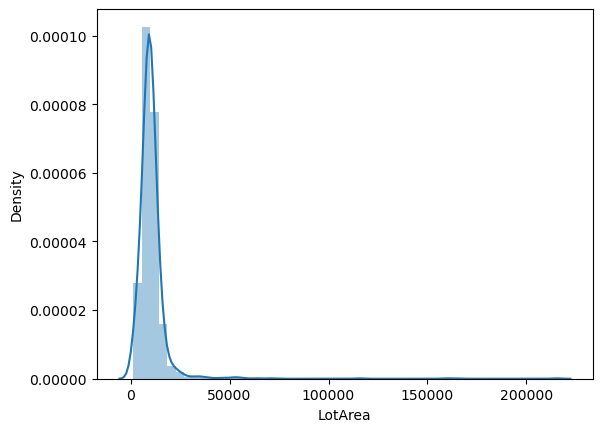

In [10]:
#LotArea: Lot size in square feet
sns.distplot(house['LotArea'])
plt.show()

In [11]:
#Street: Type of road access to property
       #Grvl Gravel
       #Pave Paved
house['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [12]:
#Alley: Type of alley access to property
       #Grvl Gravel
       #Pave Paved
       #NA No alley access
house['Alley'].astype('category').value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [13]:
#LotShape: General shape of property
       #Reg Regular
       #IR1 Slightly irregular
       #IR2 Moderately Irregular
       #IR3 Irregular
house['LotShape'].astype('category').value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [14]:
#LandContour: Flatness of the property
       #Lvl Near Flat/Level
       #Bnk Banked - Quick and significant rise from street grade to building
       #HLS Hillside - Significant slope from side to side
       #Low Depression
house['LandContour'].astype('category').value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [15]:
#Utilities: Type of utilities available
       #AllPub All public Utilities (E,G,W,& S)	
       #NoSewr Electricity, Gas, and Water (Septic Tank)
       #NoSeWa Electricity and Gas Only
       #ELO Electricity only
house['Utilities'].astype('category').value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [16]:
#LotConfig: Lot configuration
       #Inside Inside lot
       #Corner Corner lot
       #CulDSac Cul-de-sac
       #FR2 Frontage on 2 sides of property
       #FR3 Frontage on 3 sides of property
house['LotConfig'].astype('category').value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [17]:
#LandSlope: Slope of property
       #Gtl Gentle slope
       #Mod Moderate Slope
       #Sev Severe Slope
house['LandSlope'].astype('category').value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [18]:
#Neighborhood: Physical locations within Ames city limits
       #Blmngtn Bloomington Heights
       #Blueste Bluestem
       #BrDale  Briardale
       #BrkSide Brookside
       #ClearCr Clear Creek
       #CollgCr College Creek
       #Crawfor Crawford
       #Edwards Edwards
       #Gilbert Gilbert
       #IDOTRR  Iowa DOT and Rail Road
       #MeadowV Meadow Village
       #Mitchel Mitchell
       #Names   North Ames
       #NoRidge Northridge
       #NPkVill Northpark Villa
       #NridgHt Northridge Heights
       #NWAmes  Northwest Ames
       #OldTown Old Town
       #SWISU   South & West of Iowa State University
       #Sawyer  Sawyer
       #SawyerW Sawyer West
       #Somerst Somerset
       #StoneBr Stone Brook
       #Timber  Timberland
       #Veenker Veenker
house['Neighborhood'].astype('category').value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [19]:
#Condition1: Proximity to various conditions
       #Artery Adjacent to arterial street
       #Feedr  Adjacent to feeder street
       #Norm   Normal
       #RRNn   Within 200' of North-South Railroad
       #RRAn   Adjacent to North-South Railroad
       #PosN   Near positive off-site feature--park, greenbelt, etc.
       #PosA   Adjacent to postive off-site feature
       #RRNe   Within 200' of East-West Railroad
       #RRAe   Adjacent to East-West Railroad
house['Condition1'].astype('category').value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [20]:
#Condition2: Proximity to various conditions (if more than one is present)
       #Artery Adjacent to arterial street
       #Feedr  Adjacent to feeder street
       #Norm   Normal
       #RRNn   Within 200' of North-South Railroad
       #RRAn   Adjacent to North-South Railroad
       #PosN   Near positive off-site feature--park, greenbelt, etc.
       #PosA   Adjacent to postive off-site feature
       #RRNe   Within 200' of East-West Railroad
       #RRAe   Adjacent to East-West Railroad
house['Condition2'].astype('category').value_counts()

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [21]:
#BldgType: Type of dwelling
       #1Fam Single-family Detached	
       #2FmCon Two-family Conversion; originally built as one-family dwelling
       #Duplx Duplex
       #TwnhsE Townhouse End Unit
       #TwnhsI Townhouse Inside Unit
house['BldgType'].astype('category').value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [22]:
#HouseStyle: Style of dwelling
       #1Story One story
       #1.5Fin One and one-half story: 2nd level finished
       #1.5Unf One and one-half story: 2nd level unfinished
       #2Story Two story
       #2.5Fin Two and one-half story: 2nd level finished
       #2.5Unf Two and one-half story: 2nd level unfinished
       #SFoyer Split Foyer
       #SLvl   Split Level
house['HouseStyle'].astype('category').value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [23]:
#OverallQual: Rates the overall material and finish of the house
       #10 Very Excellent
       #9  Excellent
       #8  Very Good
       #7  Good
       #6  Above Average
       #5  Average
       #4  Below Average
       #3  Fair
       #2  Poor
       #1  Very Poor
house['OverallQual'].astype('category').value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [24]:
#OverallCond: Rates the overall condition of the house
       #10 Very Excellent
       #9  Excellent
       #8  Very Good
       #7  Good
       #6  Above Average
       #5  Average
       #4  Below Average
       #3  Fair
       #2  Poor
       #1  Very Poor
house['OverallCond'].astype('category').value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [25]:
#RoofStyle: Type of roof
       #Flat Flat
       #Gable Gable
       #Gambrel Gabrel (Barn)
       #Hip Hip
       #Mansard Mansard
       #Shed Shed
house['RoofStyle'].astype('category').value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [26]:
#RoofMatl: Roof material
       #ClyTile Clay or Tile
       #CompShg Standard (Composite) Shingle
       #Membran Membrane
       #Metal   Metal
       #Roll    Roll
       #Tar&Grv Gravel & Tar
       #WdShake Wood Shakes
       #WdShngl Wood Shingles
house['RoofMatl'].astype('category').value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [27]:
#Exterior1st: Exterior covering on house
       #AsbShng Asbestos Shingles
       #AsphShn Asphalt Shingles
       #BrkComm Brick Common
       #BrkFace Brick Face
       #CBlock  Cinder Block
       #CemntBd Cement Board
       #HdBoard Hard Board
       #ImStucc Imitation Stucco
       #MetalSd Metal Siding
       #Other   Other
       #Plywood Plywood
       #PreCast PreCast
       #Stone   Stone
       #Stucco  Stucco
       #VinylSd Vinyl Siding
       #Wd Sdng Wood Siding
       #WdShing Wood Shingles
house['Exterior1st'].astype('category').value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

In [28]:
#Exterior2nd: Exterior covering on house (if more than one material)
       #sbShng sbestos Shingles
       #sphShn sphalt Shingles
       #rkComm rick Common
       #rkFace rick Face
       #Block inder Block
       #emntBd ement Board
       #dBoard ard Board
       #mStucc mitation Stucco
       #etalSd etal Siding
       #ther ther
       #lywood lywood
       #reCast reCast
       #tone Stone
       #tucco Stucco
       #inylSd Vinyl Siding
       #d Sdng Wood Siding
       #dShing Wood Shingles
house['Exterior2nd'].astype('category').value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [29]:
#ExterQual: Evaluates the quality of the material on the exterior
       #Ex Excellent
       #Gd Good
       #TA Average/Typical
       #Fa Fair
       #Po Poor
house['ExterQual'].astype('category').value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [30]:
#MasVnrType: Masonry veneer type
       #BrkCmn Brick Common
       #BrkFace Brick Face
       #CBlock Cinder Block
       #None None
       #Stone Stone
house['MasVnrType'].astype('category').value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [31]:
#ExterCond: Evaluates the present condition of the material on the exterior
       #Ex Excellent
       #Gd Good
       #TA Average/Typical
       #Fa Fair
       #Po Poor
house['ExterCond'].astype('category').value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [32]:
#Foundation: Type of foundation
       #BrkTil Brick & Tile
       #CBlock Cinder Block
       #PConc  Poured Contrete
       #Slab   Slab
       #Stone  Stone
       #Wood   Wood
house['Foundation'].astype('category').value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [33]:
#BsmtQual: Evaluates the height of the basement
       #Ex Excellent (100+ inches)	
       #Gd Good (90-99 inches)
       #TA Typical (80-89 inches)
       #Fa Fair (70-79 inches)
       #Po Poor (<70 inches
       #NA No Basement
house['BsmtQual'].astype('category').value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [34]:
#BsmtCond: Evaluates the general condition of the basement
       #Ex Excellent
       #Gd Good
       #TA Typical - slight dampness allowed
       #Fa Fair - dampness or some cracking or settling
       #Po Poor - Severe cracking, settling, or wetness
       #NA No Basement
house['BsmtCond'].astype('category').value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [35]:
#BsmtExposure: Refers to walkout or garden level walls
       #Gd Good Exposure
       #Av Average Exposure (split levels or foyers typically score average or above)	
       #Mn Mimimum Exposure
       #No No Exposure
       #NA No Basement
house['BsmtExposure'].astype('category').value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [36]:
#BsmtFinType1: Rating of basement finished area
       #GLQ Good Living Quarters
       #ALQ Average Living Quarters
       #BLQ Below Average Living Quarters	
       #Rec Average Rec Room
       #LwQ Low Quality
       #Unf Unfinshed
       #NA No Basement
house['BsmtFinType1'].astype('category').value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [37]:
#BsmtFinType2: Rating of basement finished area (if multiple types)
       #GLQ Good Living Quarters
       #ALQ Average Living Quarters
       #BLQ Below Average Living Quarters	
       #Rec Average Rec Room
       #LwQ Low Quality
       #Unf Unfinshed
       #NA No Basement
house['BsmtFinType2'].astype('category').value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [38]:
#Heating: Type of heating
       #Floor Floor Furnace
       #GasA  Gas forced warm air furnace
       #GasW  Gas hot water or steam heat
       #Grav  Gravity furnace	
       #OthW  Hot water or steam heat other than gas
       #Wall  Wall furnace
house['Heating'].astype('category').value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [39]:
#HeatingQC: Heating quality and condition
       #Ex Excellent
       #Gd Good
       #TA Average/Typical
       #Fa Fair
       #Po Poor
house['HeatingQC'].astype('category').value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [40]:
#CentralAir: Central air conditioning
       #N No
       #Y Yes
house['CentralAir'].astype('category').value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [41]:
#Electrical: Electrical system
       #SBrkr	Standard Circuit Breakers & Romex
       #FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       #FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       #FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       #Mix	Mixed
house['Electrical'].astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [42]:
#KitchenQual: Kitchen quality
       #Ex	Excellent
       #Gd	Good
       #TA	Typical/Average
       #Fa	Fair
       #Po	Poor
house['KitchenQual'].astype('category').value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [43]:
#Functional: Home functionality (Assume typical unless deductions are warranted)
       #Typ	Typical Functionality
       #Min1	Minor Deductions 1
       #Min2	Minor Deductions 2
       #Mod	Moderate Deductions
       #Maj1	Major Deductions 1
       #Maj2	Major Deductions 2
       #Sev	Severely Damaged
       #Sal	Salvage only
house['Functional'].astype('category').value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [44]:
#FireplaceQu: Fireplace quality
       #Ex	Excellent - Exceptional Masonry Fireplace
       #Gd	Good - Masonry Fireplace in main level
       #TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       #Fa	Fair - Prefabricated Fireplace in basement
       #Po	Poor - Ben Franklin Stove
       #NA	No Fireplace
house['FireplaceQu'].astype('category').value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [45]:
#GarageType: Garage location
       #2Types	More than one type of garage
       #Attchd	Attached to home
       #Basment	Basement Garage
       #BuiltIn	Built-In (Garage part of house - typically has room above garage)
       #CarPort	Car Port
       #Detchd	Detached from home
       #NA	No Garage
house['GarageType'].astype('category').value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [46]:
#GarageFinish: Interior finish of the garage
       #Fin	Finished
       #RFn	Rough Finished
       #Unf	Unfinished
       #NA	No Garage
house['GarageFinish'].astype('category').value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [47]:
#GarageQual: Garage quality
       #Ex	Excellent
       #Gd	Good
       #TA	Typical/Average
       #Fa	Fair
       #Po	Poor
       #NA	No Garage
house['GarageQual'].astype('category').value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [48]:
#GarageCond: Garage condition
       #Ex	Excellent
       #Gd	Good
       #TA	Typical/Average
       #Fa	Fair
       #Po	Poor
       #NA	No Garage
house['GarageCond'].astype('category').value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [49]:
#PavedDrive: Paved driveway
       #Y	Paved 
       #P	Partial Pavement
       #N	Dirt/Gravel
house['PavedDrive'].astype('category').value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [50]:
#SaleType: Type of sale
       #WD 	Warranty Deed - Conventional
       #CWD	Warranty Deed - Cash
       #VWD	Warranty Deed - VA Loan
       #New	Home just constructed and sold
       #COD	Court Officer Deed/Estate
       #Con	Contract 15% Down payment regular terms
       #ConLw	Contract Low Down payment and low interest
       #ConLI	Contract Low Interest
       #ConLD	Contract Low Down
       #Oth	Other
house['SaleType'].astype('category').value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [51]:
#SaleCondition: Condition of sale
       #Normal	Normal Sale
       #Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       #AdjLand	Adjoining Land Purchase
       #Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       #Family	Sale between family members
       #Partial	Home was not completed when last assessed (associated with New Homes)
house['SaleCondition'].astype('category').value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

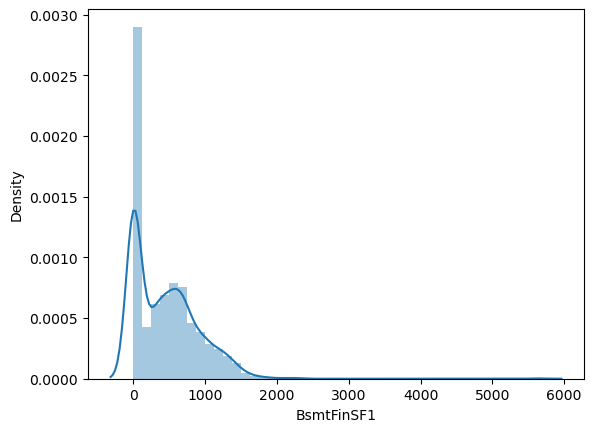

In [52]:
# Predictor variable: Type 1 finished square feet
sns.distplot(house['BsmtFinSF1'])
plt.show()

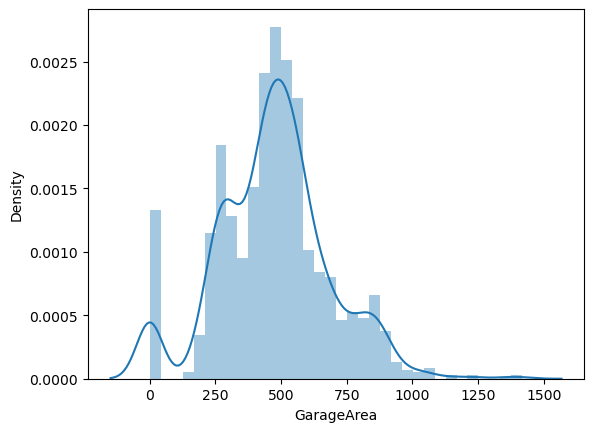

In [53]:
# Predictor variable: Size of garage in square feet
sns.distplot(house['GarageArea'])
plt.show()

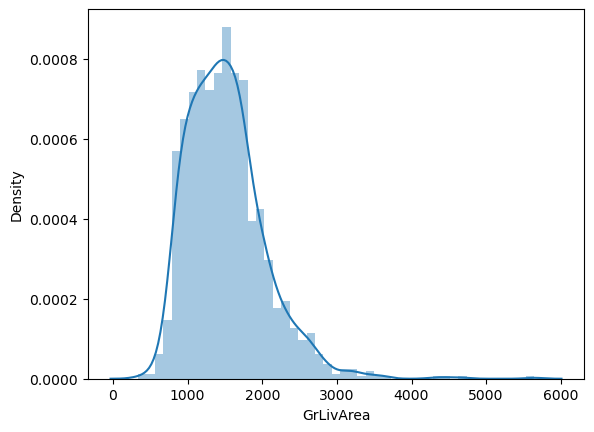

In [54]:
# Predictor variable: Above grade (ground) living area square feet
sns.distplot(house['GrLivArea'])
plt.show()

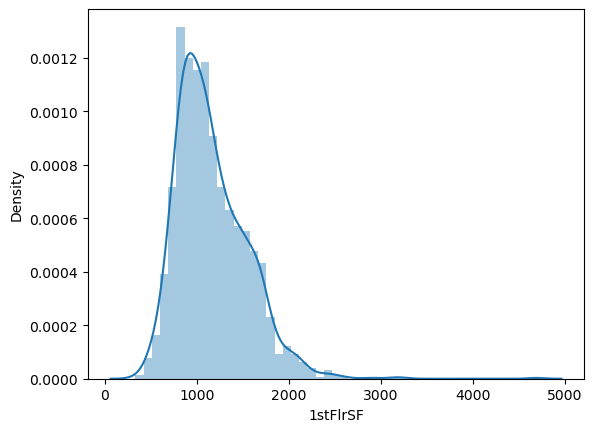

In [55]:
# Predictor variable: First Floor square feet
sns.distplot(house['1stFlrSF'])
plt.show()

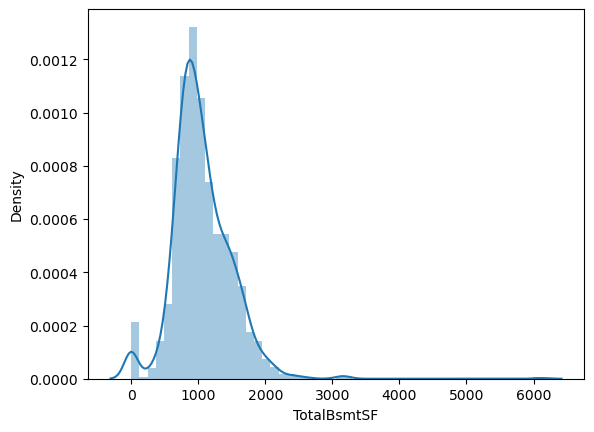

In [56]:
# Predictor variable: Total square feet of basement area
sns.distplot(house['TotalBsmtSF'])
plt.show()


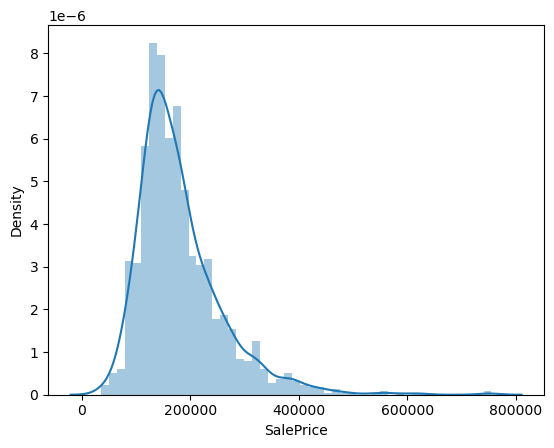

In [57]:
# target variable: price of car
sns.distplot(house['SalePrice'])
plt.show()

In [58]:
#Data Exploration
#To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.
#We'll first subset the list of all (independent) numeric variables, and then make a pairwise plot.

In [59]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head(100)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,NaN,9765,6,8,1993,1993,68.0,310,...,232,63,0,0,0,0,480,4,2009,185000
96,97,20,78.0,10264,7,5,1999,1999,183.0,1162,...,158,29,0,0,0,0,0,8,2006,214000
97,98,20,73.0,10921,4,5,1965,1965,48.0,520,...,120,0,0,0,0,0,0,5,2007,94750
98,99,30,85.0,10625,5,5,1920,1950,0.0,108,...,0,0,77,0,0,0,400,5,2010,83000


In [60]:
#Here, although the variable OverallQual is numeric (int), we'd rather treat it as categorical since it has only 10 discrete values. Also, we do not want 'car_ID'.

In [61]:
# dropping ID, OverallQual, LotFrontage, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF2, 2ndFlrSF, LowQualFinSF, GarageYrBlt, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, YrSold, which these variales don't relate or have many NaN, zero values,..etc to the target variable.
house_numeric = house_numeric.drop(['OverallQual','Id', 'LotFrontage', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2','2ndFlrSF', 'LowQualFinSF', 'GarageYrBlt', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold'], axis=1)
house_numeric.head()

,MSSubClass,LotArea,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice
0,60,8450,5,706,150,856,856,1710,1,0,...,3,1,8,0,2,548,0,61,2,208500
1,20,9600,8,978,284,1262,1262,1262,0,1,...,3,1,6,1,2,460,298,0,5,181500
2,60,11250,5,486,434,920,920,1786,1,0,...,3,1,6,1,2,608,0,42,9,223500
3,70,9550,5,216,540,756,961,1717,1,0,...,3,1,7,1,3,642,0,35,2,140000
4,60,14260,5,655,490,1145,1145,2198,1,0,...,4,1,9,1,3,836,192,84,12,250000


In [62]:
#This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [63]:
# correlation matrix
cor = house_numeric.corr()
cor

,MSSubClass,LotArea,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice
MSSubClass,1.000000,-0.139781,-0.059316,-0.069836,-0.140759,-0.238518,-0.251758,0.074853,0.003491,-0.002333,...,-0.023438,0.281721,0.040380,-0.045569,-0.040110,-0.098672,-0.012579,-0.006100,-0.013585,-0.084284
LotArea,-0.139781,1.000000,-0.005636,0.214103,-0.002618,0.260833,0.299475,0.263116,0.158155,0.048046,...,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,0.001205,0.263843
OverallCond,-0.059316,-0.005636,1.000000,-0.046231,-0.136841,-0.171098,-0.144203,-0.079686,-0.054942,0.117821,...,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,-0.003511,-0.077856
BsmtFinSF1,-0.069836,0.214103,-0.046231,1.000000,-0.495251,0.522396,0.445863,0.208171,0.649212,0.067418,...,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.015727,0.386420
BsmtUnfSF,-0.140759,-0.002618,-0.136841,-0.495251,1.000000,0.415360,0.317987,0.240257,-0.422900,-0.095804,...,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,0.034888,0.214479
TotalBsmtSF,-0.238518,0.260833,-0.171098,0.522396,0.415360,1.000000,0.819530,0.454868,0.307351,-0.000315,...,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,0.013196,0.613581
1stFlrSF,-0.251758,0.299475,-0.144203,0.445863,0.317987,0.819530,1.000000,0.566024,0.244671,0.001956,...,0.127401,0.068101,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,0.031372,0.605852
GrLivArea,0.074853,0.263116,-0.079686,0.208171,0.240257,0.454868,0.566024,1.000000,0.034836,-0.018918,...,0.521270,0.100063,0.825489,0.461679,0.467247,0.468997,0.247433,0.330224,0.050240,0.708624
BsmtFullBath,0.003491,0.158155,-0.054942,0.649212,-0.422900,0.307351,0.244671,0.034836,1.000000,-0.147871,...,-0.150673,-0.041503,-0.053275,0.137928,0.131881,0.179189,0.175315,0.067341,-0.025361,0.227122
BsmtHalfBath,-0.002333,0.048046,0.117821,0.067418,-0.095804,-0.000315,0.001956,-0.018918,-0.147871,1.000000,...,0.046519,-0.037944,-0.023836,0.028976,-0.020891,-0.024536,0.040161,-0.025324,0.032873,-0.016844


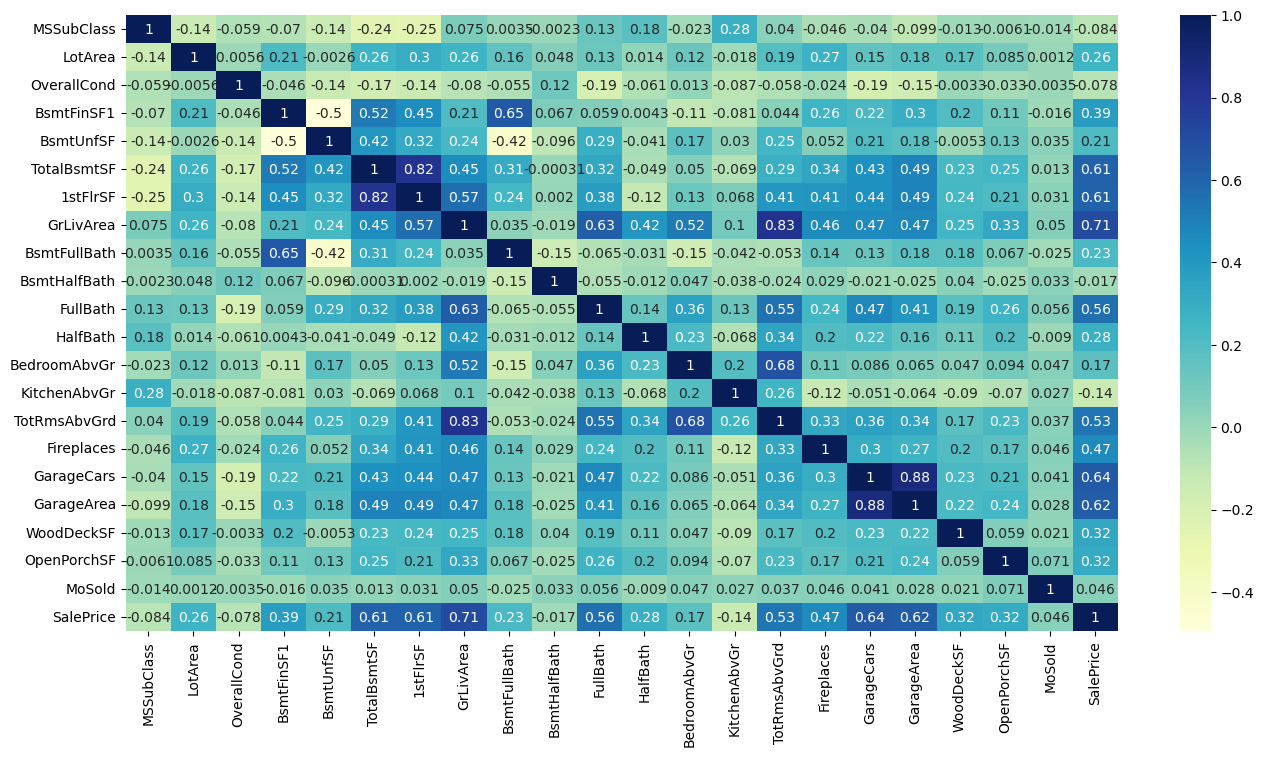

In [64]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [65]:
#The heatmap shows some useful insights:

#Correlation of price with independent variables:

#Price is highly (positively) correlated with TotalBsmtSF (corr=0.61), 1stFlrSF (corr=0.61), GrLivArea(corr=0.71), FullBath(corr=0.56), Fireplces(corr=0.47), GarageCars(corr=0.64), GarageArea(corr=0.62),(notice how all of these variables represent the size/area/facilitate of the house)

#Price is negatively correlated to KitchenAbvGr (-0.1 approximately). 

#Correlation among independent variables:

#Many independent variables are highly correlated (look at the bottom-right part of matrix)
#Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

In [66]:
#2. Data Cleaning
#Let's now conduct some data cleaning steps.

#We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except OverallQual, which should rather be a categorical variable (so that dummy variable are created for the categories).

#Note that it can be used in the model as a numeric variable also.

In [67]:
# variable formats
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [68]:
# converting symboling to categorical
house['OverallQual'] = house['OverallQual'].astype('object')
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [69]:
# outliers
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [70]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [71]:
#3. Data Preparation
#Data Preparation
#Let's now prepare the data and build the model.

In [72]:
# split into X and y; let's start with 37 variables excluding MSSubClass, Alley, BsmtFinSF2, LowQualFinSF, 'BsmtFullBath', EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, YrSold, , 'MoSold', 'KitchenAbvGr', 'BedroomAbvGr', 'LotArea', 'BsmtFinSF1', , 'WoodDeckSF', 'BsmtHalfBath', 'MasVnrArea' which have a lot of NaN, 0 values..etc

X = house.loc[:, ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']] # predictors in variable X

y = house['SalePrice'] # response variable in Y

In [73]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [74]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [75]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [76]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [77]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['OverallCond', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=212)

In [78]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [79]:
#3. Model Building and Evaluation
#Linear Regression
#Let's now try predicting house prices, a dataset using linear regression.

In [80]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [81]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

69601530286046.09
[ 6.77369214e+03 -7.73301713e+03  1.95529791e+04 -7.60098946e+03
 -2.82052522e+03  4.00783780e+04  1.84985927e+03  1.89242376e+02
 -2.60174942e+03  4.85656169e+02  2.26033583e+03  4.11255148e+03
  7.21176198e+03  4.53170849e+03  1.62724696e+04  1.31494362e+04
 -6.55442340e+02  9.79572448e+02  1.52441040e+03 -1.19949598e+02
 -1.01173720e+02  4.63920987e+02  2.08456727e+03  1.43577800e+03
 -1.68988320e+03  1.61654111e+02 -8.60551822e+02  7.75987063e+02
  9.30222201e+02  1.93605810e+02  8.92842604e+02  1.53179619e+03
  1.37615007e+03  2.31671837e+03  5.62260293e+03 -4.75538515e+02
  2.32417798e+03  1.01921678e+03 -2.14240900e+03  3.40270716e+01
  1.55978672e+02  1.11267598e+03  7.35298450e+02  5.33182105e+03
  3.99762584e+03 -4.55095776e+02  6.54767935e+02  6.47653243e+02
  2.15407379e+03  5.65489923e+03  1.84306729e+03  1.14625041e+03
  1.46148138e+03 -1.54107487e+02  4.50288040e+03  1.18607025e+03
  5.91478403e+02 -3.72196942e+02  9.65448916e+02  1.70569917e+02
 -4.429

In [82]:
from sklearn.metrics import r2_score, mean_squared_error

In [83]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9484218530873392
-3.391040207530627e+22
329104620084.86646
9.558367523888327e+34
322335573.05079967
2.1822756903854627e+32


In [84]:
#Ridge and Lasso Regression
#Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [85]:
#Ridge Regression

In [86]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [88]:
#Fitting Ridge model for alpha = 5.0 and printing coefficients which have been penalised
alpha = 5.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 6.40295754e+03 -5.87542146e+03  1.43643239e+04 -4.93132484e+03
 -2.63260354e+03  3.54916657e+04  2.80869048e+03  7.41781745e+02
 -1.55239008e+03  8.36561508e+02  4.58307299e+03  2.07542500e+03
  4.80745909e+03  3.25762028e+03  1.12422687e+04  9.30292516e+03
 -4.71598820e+02  9.00163118e+02  4.37729795e+02 -8.43623069e+01
  5.36649919e+02  9.88608886e+02  2.96926039e+03  1.67724908e+03
 -1.79073013e+03 -9.76673155e+00 -9.46787368e+02  8.50742419e+02
  1.41867188e+03  1.36613980e+02  5.13193639e+02  5.56994378e+02
  1.19070527e+03  1.69302614e+03  5.36645096e+03 -1.58744818e+03
  1.60204451e+03  7.12737503e+01 -2.31687645e+03 -5.47520504e+02
 -6.94094629e+02  8.36345423e+02  1.81119046e+02  5.86235198e+03
  4.36457104e+03 -1.55840513e+03  6.61146810e+02  1.52797722e+01
  1.78333515e+03  5.25045121e+03  2.01136192e+03  7.25664368e+02
  1.39521287e+03 -7.40676743e+02  4.24330389e+03  1.35016529e+03
  6.81044993e+02 -5.11067669e+02  1.16957392e+03  7.19107671e+01
 -2.81158043e+02  1.05443

In [89]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9455464492362361
0.8283313006097378
347451705985.6122
483884714040.2744
340305294.7949189
1104759621.0965168


In [90]:
#Question 1
#What is the optimal value of alpha for ridge regression? What will be the changes in the model if you choose double the value of alpha for both ridge? What will be the most important predictor variables after the change is implemented?

In [91]:
#Optimal value of alpha for ridge regression
ridge_optimal_alpha = model_cv.best_params_
print("Optimal value of alpha:", ridge_optimal_alpha)

Optimal value of alpha: {'alpha': 5.0}


In [92]:
# Fitting Ridge model for alpha = 2 * optimal_alpha
new_alpha = 2 * ridge_optimal_alpha['alpha']
ridge_new = Ridge(alpha=new_alpha)
ridge_new.fit(X_train, y_train)

Ridge(alpha=10.0)

In [93]:
# printing coefficients which have been penalized
print("Coefficients for alpha =", new_alpha)
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': ridge_new.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

Coefficients for alpha = 10.0
              Feature   Coefficient
93   RoofMatl_CompShg  50585.924741
5           GrLivArea  32156.497381
97   RoofMatl_Tar&Grv  31986.150848
99   RoofMatl_WdShngl  28832.946105
98   RoofMatl_WdShake  20833.369908
..                ...           ...
171    KitchenQual_TA  -8539.037110
170    KitchenQual_Gd  -8860.214831
142       BsmtQual_Gd  -9235.741749
143       BsmtQual_TA  -9416.572904
64    Condition2_PosN -14089.311209

[212 rows x 2 columns]


In [94]:
# The most important predictor variables after the change is implemented
top_predictors = coefficients.loc[coefficients['Coefficient'] != 0, 'Feature']
print("Most important predictor variables:")
print(top_predictors)

Most important predictor variables:
93     RoofMatl_CompShg
5             GrLivArea
97     RoofMatl_Tar&Grv
99     RoofMatl_WdShngl
98     RoofMatl_WdShake
             ...       
171      KitchenQual_TA
170      KitchenQual_Gd
142         BsmtQual_Gd
143         BsmtQual_TA
64      Condition2_PosN
Name: Feature, Length: 209, dtype: object


In [95]:
#Lasso
from sklearn.linear_model import Lasso

In [96]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [97]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [98]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [99]:
lasso.coef_

array([ 6.01034110e+03, -3.25352696e+03,  8.68275082e+03,  0.00000000e+00,
       -1.99602527e+03,  2.82090957e+04,  2.35227925e+03,  8.41760035e+02,
       -0.00000000e+00,  2.44601325e+03,  6.94091550e+03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.52986686e+03, -0.00000000e+00,
       -0.00000000e+00,  6.59754084e+02, -2.18084236e+02, -0.00000000e+00,
        0.00000000e+00,  5.01597813e+02,  1.15258048e+03,  2.18565077e+03,
       -6.88399226e+02, -0.00000000e+00, -1.04129674e+02,  1.83937436e+00,
        1.25619607e+03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.20375443e+03,  2.00211553e+02,  4.06901855e+03, -2.38524351e+03,
        0.00000000e+00, -6.57137080e+02, -1.26681173e+03, -1.71280468e+02,
       -8.45430806e+02,  0.00000000e+00, -0.00000000e+00,  5.50680536e+03,
        4.15477840e+03, -2.45996772e+03, -0.00000000e+00, -1.84535094e+02,
        3.23638371e+02,  3.60535030e+03,  8.54880612e+02,  0.00000000e+00,
        6.57310506e+02, -

In [100]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9261185447022429
0.8414244238126154
471415313122.0172
446978963606.9026
461719209.71794045
1020499916.9107366


In [101]:
#Question 1
#What is the optimal value of alpha for ridge regression? What will be the changes in the model if you choose double the value of alpha for both ridge? What will be the most important predictor variables after the change is implemented?

In [102]:
#Optimal value of alpha for lasso regression
lasso_optimal_alpha = model_cv.best_params_
print("Optimal value of alpha:", lasso_optimal_alpha)

Optimal value of alpha: {'alpha': 500}


In [103]:
# Fitting Lasso model for alpha = 2 * optimal_alpha
new_alpha = 2 * lasso_optimal_alpha['alpha']
lasso_new = Lasso(alpha=new_alpha)
lasso_new.fit(X_train, y_train)

Lasso(alpha=1000)

In [104]:
# printing coefficients which have been penalized
print("Coefficients for alpha =", new_alpha)
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lasso_new.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

Coefficients for alpha = 1000
              Feature   Coefficient
5           GrLivArea  26606.817519
86      OverallQual_9  14521.521643
87     OverallQual_10  12582.283293
85      OverallQual_8  10957.473001
10         GarageCars   8839.623172
..                ...           ...
69    BldgType_Duplex  -2809.252495
131      ExterQual_TA  -2903.888445
188  GarageFinish_Unf  -3118.286251
154  BsmtFinType1_Unf  -3142.787188
64    Condition2_PosN -11227.527134

[212 rows x 2 columns]


In [105]:
# The most important predictor variables after the change is implemented
top_predictors = coefficients.loc[coefficients['Coefficient'] != 0, 'Feature']
print("Most important predictor variables:")
print(top_predictors)

Most important predictor variables:
5             GrLivArea
86        OverallQual_9
87       OverallQual_10
85        OverallQual_8
10           GarageCars
             ...       
69      BldgType_Duplex
131        ExterQual_TA
188    GarageFinish_Unf
154    BsmtFinType1_Unf
64      Condition2_PosN
Name: Feature, Length: 87, dtype: object


In [106]:
#Question 3:

#After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [107]:
#Creating a DataFrame of coefficients and corresponding feature names
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': np.abs(lasso.coef_)})

#Sorting the coefficients in descending order
coef_df = coef_df.sort_values(by=['Coefficient'], ascending=False)
coef_df

,Feature,Coefficient
93,RoofMatl_CompShg,36194.120560
5,GrLivArea,28209.095727
97,RoofMatl_Tar&Grv,21827.661086
99,RoofMatl_WdShngl,21821.884740
98,RoofMatl_WdShake,15109.944060
...,...,...
135,ExterCond_TA,0.000000
134,ExterCond_Po,0.000000
133,ExterCond_Gd,0.000000
132,ExterCond_Fa,0.000000


In [108]:
#Selecting the top 5 features
top_5_features = coef_df['Feature'].head(5).tolist()

print(top_5_features)

['RoofMatl_CompShg', 'GrLivArea', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'RoofMatl_WdShake']


In [109]:
# Remove the five most important predictor variables from X_train and X_test
important_vars = ['RoofMatl_CompShg', 'GrLivArea', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'RoofMatl_WdShake']
X_train_new = X_train.drop(important_vars, axis=1)
X_test_new = X_test.drop(important_vars, axis=1)

In [110]:
#Fit a new Lasso model on the updated X_train dataset
lasso_new = Lasso(alpha=500)
lasso_new.fit(X_train_new, y_train)

Lasso(alpha=500)

In [111]:
#Creating a DataFrame of coefficients and corresponding feature names
coef_df = pd.DataFrame({'Feature': X_train_new.columns, 'Coefficient': np.abs(lasso_new.coef_)})

#Sorting the coefficients in descending order
coef_df = coef_df.sort_values(by=['Coefficient'], ascending=False)
coef_df

,Feature,Coefficient
85,OverallQual_9,14888.508652
86,OverallQual_10,14477.233964
84,OverallQual_8,12219.839257
3,1stFlrSF,11212.237075
63,Condition2_PosN,11101.839424
...,...,...
104,Exterior1st_Stone,0.000000
102,Exterior1st_MetalSd,0.000000
100,Exterior1st_HdBoard,0.000000
99,Exterior1st_CemntBd,0.000000


In [112]:
#Selecting the top 5 features
top_5_features = coef_df['Feature'].head(5).tolist()

print(top_5_features)

['OverallQual_9', 'OverallQual_10', 'OverallQual_8', '1stFlrSF', 'Condition2_PosN']


In [113]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.484219e-01,9.455464e-01,9.261185e-01
1,R2 Score (Test),-3.391040e+22,8.283313e-01,8.414244e-01
2,RSS (Train),3.291046e+11,3.474517e+11,4.714153e+11
3,RSS (Test),9.558368e+34,4.838847e+11,4.469790e+11
4,MSE (Train),1.795371e+04,1.844737e+04,2.148765e+04
5,MSE (Test),1.477253e+16,3.323792e+04,3.194526e+04


In [114]:
#Lets observe the changes in the coefficients after regularization
betas = pd.DataFrame(index=X.columns)

In [115]:
betas.rows = X.columns

In [116]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [117]:
pd.set_option('display.max_rows', None)
betas.head(200)

,Linear,Ridge,Lasso
OverallCond,6.773692e+03,6402.957544,6010.341099
BsmtUnfSF,-7.733017e+03,-5875.421462,-3253.526955
TotalBsmtSF,1.955298e+04,14364.323928,8682.750816
1stFlrSF,-7.600989e+03,-4931.324842,0.000000
LowQualFinSF,-2.820525e+03,-2632.603537,-1996.025268
GrLivArea,4.007838e+04,35491.665748,28209.095727
FullBath,1.849859e+03,2808.690480,2352.279252
HalfBath,1.892424e+02,741.781745,841.760035
TotRmsAbvGrd,-2.601749e+03,-1552.390080,-0.000000
Fireplaces,4.856562e+02,836.561508,2446.013247
